## Submit job

In [13]:
from quri_parts_oqtopus.backend import OqtopusSseBackend
from src.adapter import QuriAdapter, collect_payloads_from_job

DEVICE = "anemone"
PROGRAM = "check_rabi"

backend = OqtopusSseBackend()

job = backend.run_sse(
    file_path=f"program/{DEVICE}/{PROGRAM}.py",
    device_id=f"{DEVICE}-pulse",
    name=PROGRAM,
)
print(f"job_id = {job.job_id}")

job.wait_for_completion()
print(f"job_status = {job.status}  elapsed={job.execution_time}")

adapter = QuriAdapter(backend)

payloads = collect_payloads_from_job(
    backend=adapter,
    job_id=job.job_id,
)

print("sample:", payloads[:3], f"... len={len(payloads)}")


job_id = 068e748f-9349-7e87-8000-7093b4ac8b10
job_status = succeeded  elapsed=26.693
sample: [{'mode': '', 'data': {'Q08': {'raw': {'I': [-1.3122785091400146, -1.2106316089630127, -1.0124226808547974, -0.7858467102050781, -0.4975375831127167, -0.37116968631744385, -0.3672914505004883, -0.6694369316101074, -0.8246520161628723, -1.0965702533721924, -1.2877305746078491, -1.3044633865356445, -1.1166805028915405, -0.8611054420471191, -0.6652853488922119, -0.4689732789993286, -0.36736828088760376, -0.5311834812164307, -0.7206685543060303, -0.8901496529579163, -1.1562882661819458, -1.2519588470458984, -1.2061642408370972, -1.029012680053711, -0.7450767755508423, -0.5730503797531128, -0.4211471974849701, -0.48180919885635376, -0.5479354858398438, -0.7324696779251099, -1.0793964862823486, -1.1357433795928955, -1.2518281936645508, -1.1033326387405396, -0.9639262557029724, -0.6704649329185486, -0.5563751459121704, -0.4719264507293701, -0.5253995656967163, -0.6941691637039185, -0.8140225410461426,

## Plot

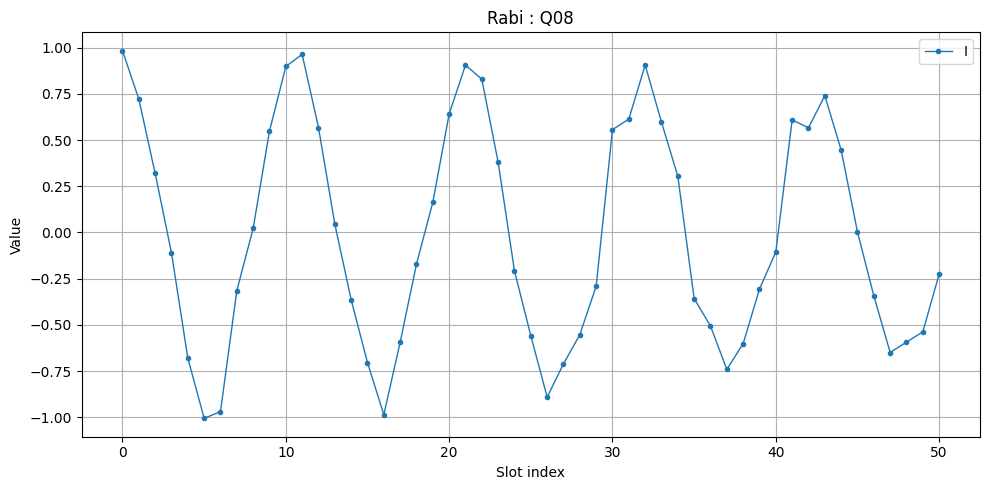

In [14]:
from src.plotters import plot_payload

p = payloads[0]
fig, ax = plot_payload(p, program=PROGRAM)